In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
os.chdir("/data/phillip_guo/mechanistic-unlearning")

## Analyze Localizations

[-0.01513671875, -0.063232421875, 0.007122039794921875, -0.0240478515625, -0.0231475830078125, -0.004451751708984375, 0.0391845703125, 0.0026721954345703125, 0.01157379150390625, -0.01959228515625, 0.0026721954345703125, 0.0026721954345703125, -0.0213775634765625, -0.0124664306640625, -0.0080108642578125, -0.0026721954345703125, -0.01513671875, 0.018707275390625, 0.009796142578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
google_gemma-7b chosen layers: [1, 3, 4, 6, 12]
[-0.00504302978515625, -0.0789794921875, 0.01849365234375, -0.03192138671875, -0.03277587890625, -0.0117645263671875, 0.0504150390625, -0.00839996337890625, 0.0, -0.0369873046875, 0.002521514892578125, -0.0008401870727539062, -0.00504302978515625, -0.012603759765625, -0.012603759765625, -0.002521514892578125, -0.0100860595703125, 0.0218505859375, 0.0277252197265625, 0.0260467529296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
google_gemma-7b chosen layers: [1, 3, 4, 6, 9, 17, 18, 19]
[-0.01253509521484375, -0.01969909

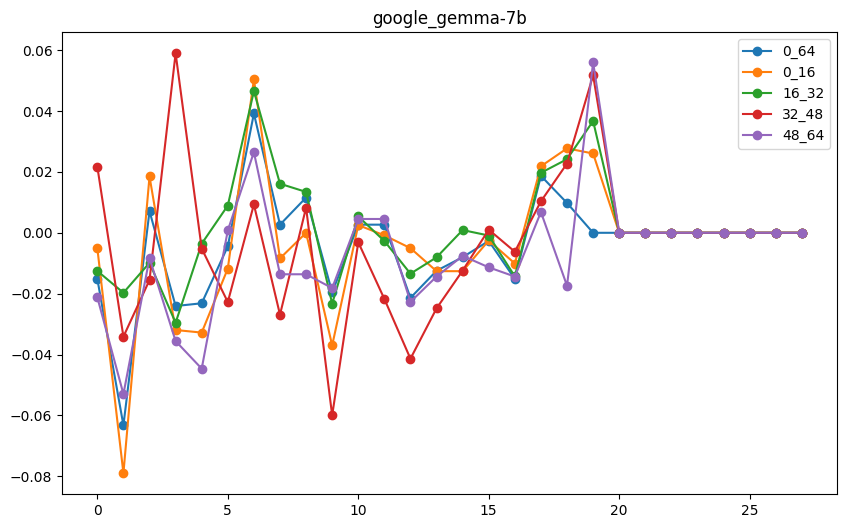

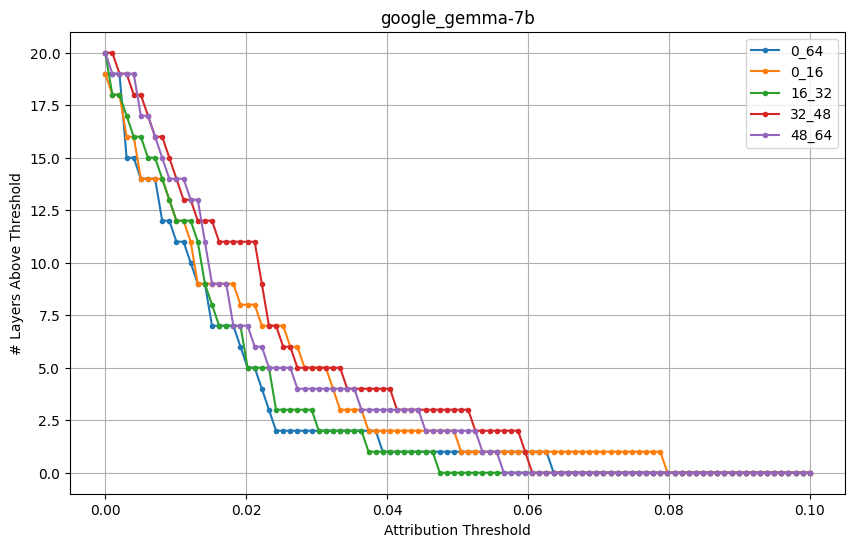

[0.0165557861328125, 0.006622314453125, 0.01158905029296875, 0.0264892578125, 0.0298004150390625, 0.033111572265625, -0.01158905029296875, 0.0380859375, 0.11090087890625, 0.059600830078125, 0.0215301513671875, -0.006622314453125, 0.0033111572265625, 0.00496673583984375, 0.01324462890625, 0.01324462890625, 0.0033111572265625, 0.0215301513671875, -0.00827789306640625, 0.00827789306640625, 0.006622314453125, 0.0033111572265625, 0.01158905029296875, -0.00827789306640625, -0.0099334716796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
google_gemma-2-9b chosen layers: [3, 4, 5, 7, 8, 9, 10, 17]
[0.01107025146484375, 0.007381439208984375, 0.007381439208984375, 0.027679443359375, 0.033203125, 0.0166015625, -0.0036907196044921875, 0.0295257568359375, 0.0682373046875, 0.05535888671875, 0.0166015625, 0.007381439208984375, -0.0018453598022460938, -0.0036907196044921875, 0.01476287841796875, -0.0018453598022460938, -0.00922393798828125, 0.003690719604492187

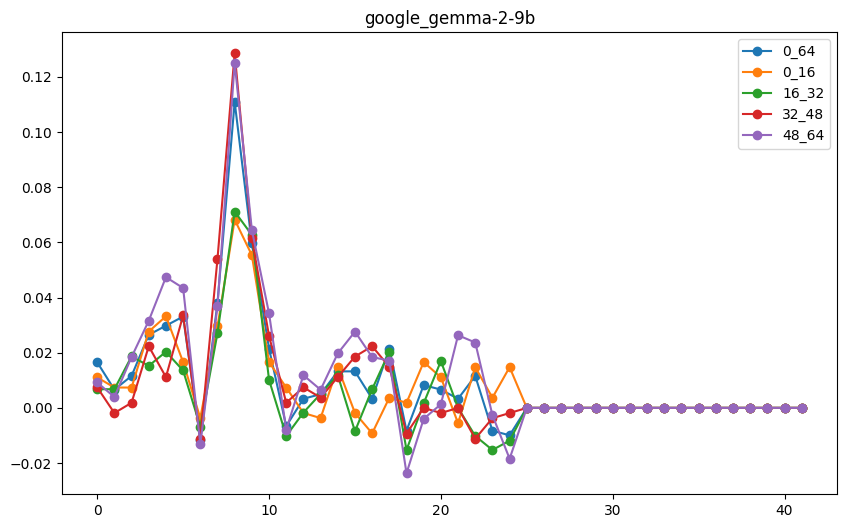

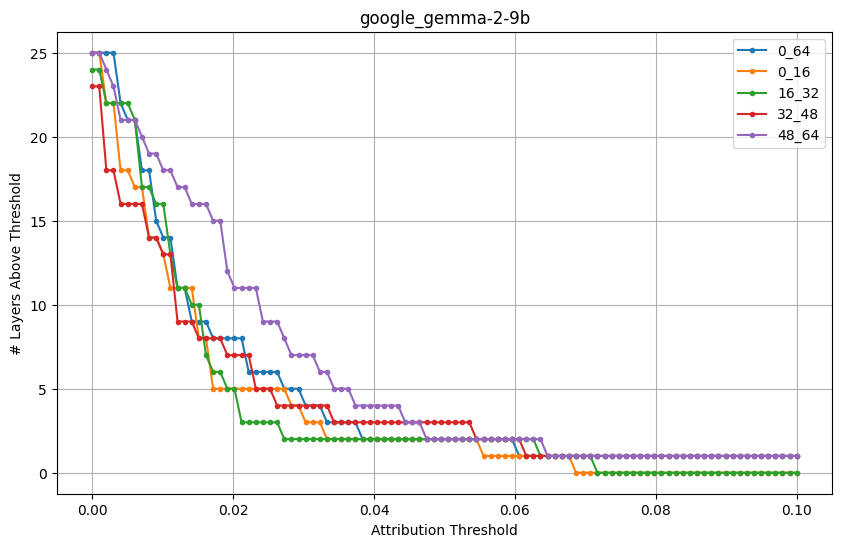

[0.0014667510986328125, 0.0010538101196289062, 0.0030574798583984375, 0.0014524459838867188, 0.00366973876953125, 0.007305145263671875, 0.009326934814453125, 0.003528594970703125, -0.0025634765625, 0.0008864402770996094, -0.0007882118225097656, -0.00260162353515625, 0.004138946533203125, 0.00247955322265625, 0.011791229248046875, 0.018268585205078125, 0.031223297119140625, 0.040439605712890625, 0.049900054931640625, 0.07776260375976562, 0.09949111938476562, 0.10547256469726562, 0.09680557250976562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
meta-llama_Meta-Llama-3-8B chosen layers: [16, 17, 18, 19, 20, 21, 22]
[6.103515625e-05, 0.00079345703125, 0.001495361328125, 0.00244140625, 0.00506591796875, 0.006500244140625, 0.0072021484375, 0.005523681640625, -0.005828857421875, -0.002197265625, -0.003204345703125, -0.00091552734375, 0.0030517578125, -0.005706787109375, 0.0169677734375, 0.009033203125, 0.0348968505859375, 0.0166015625, 0.05938911437988281, 0.0810546875, 0.0760498046875, 0.124

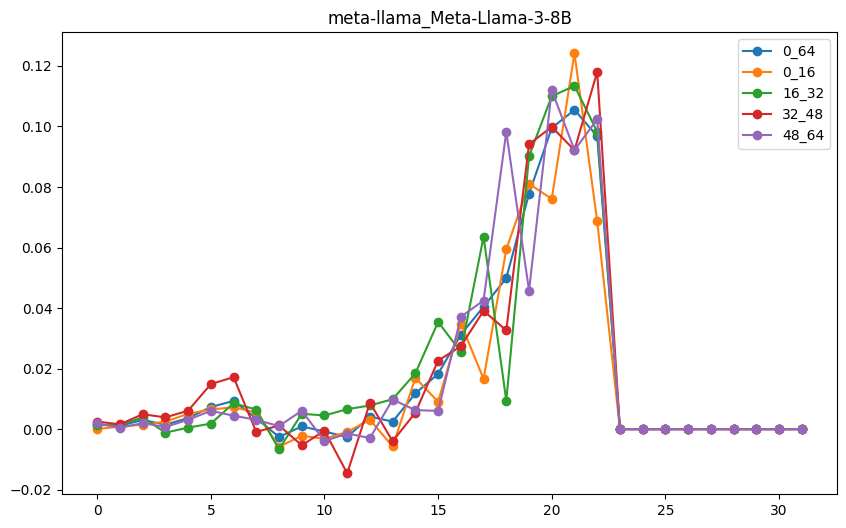

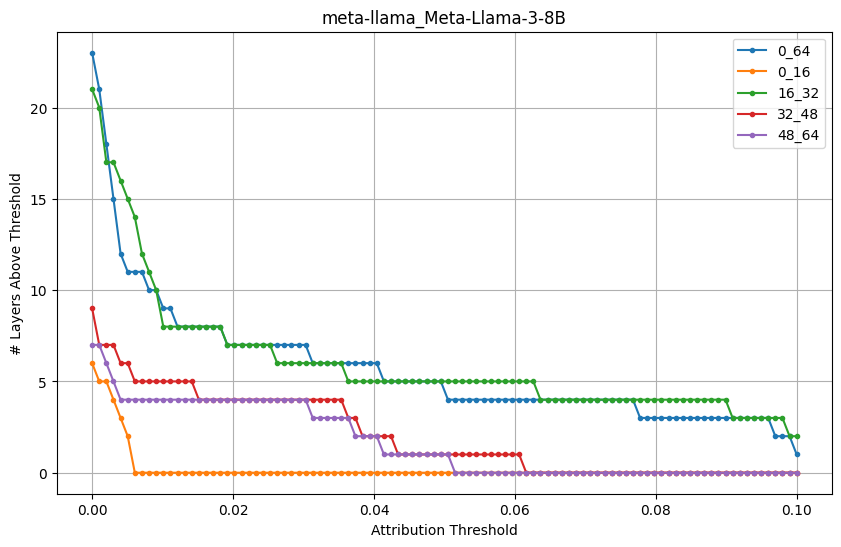

In [4]:
# Create thresholds array
thresholds = np.linspace(0, 0.1, 100)  # Adjust range as needed based on your attr values

subtract_off_last_point = True
save_new_info = False

abs_attr_threshold = 0.02
for model_type, num_layers in [("google_gemma-7b", 28), ("google_gemma-2-9b", 42), ("meta-llama_Meta-Llama-3-8B", 32)]:
    plt.figure(figsize=(10, 6))
    for forget_split in ["0_64", "0_16", "16_32", "32_48", "48_64"]:
        with open(f"experiments/counterfact_manual/results/{model_type}_enrichment_mlp_results_{forget_split}.json", "r") as f:
            enrichment_mlp_results = json.load(f)
        
        attrs = [enrichment_mlp_results[f"m{layer}"] for layer in range(num_layers)]
        if subtract_off_last_point:
            attrs = [attr - attrs[-1] for attr in attrs] # assuming they should all fall off to 0 at the end
        print(attrs)

        chosen_layers = [layer for layer in range(num_layers) if abs(attrs[layer]) > abs_attr_threshold]
        print(f"{model_type} chosen layers: {chosen_layers}")
        # save chosen layers

        if save_new_info:
            result_dict = {"chosen_layers": chosen_layers, "abs_attr_threshold": abs_attr_threshold, "original_attrs": attrs}
            with open(f"experiments/counterfact_manual/results/{model_type}_manual_layers_{forget_split}.json", "w") as f:
                json.dump(result_dict, f)

        plt.plot(attrs, label=f"{forget_split}", marker="o")
    plt.title(f"{model_type}")
    plt.legend()
    plt.show()



    plt.figure(figsize=(10, 6))
    
    for forget_split in ["0_64", "0_16", "16_32", "32_48", "48_64"]:
        # Load data
        with open(f"experiments/counterfact_manual/results/{model_type}_enrichment_mlp_results_{forget_split}.json", "r") as f:
            enrichment_mlp_results = json.load(f)
        
        attrs = [abs(enrichment_mlp_results[f"m{layer}"]) for layer in range(num_layers)]
        if subtract_off_last_point:
            attrs = [attr - attrs[-1] for attr in attrs] # assuming they should all fall off to 0 at the end
        # Count layers exceeding each threshold
        layers_over_threshold = [sum(attr > threshold for attr in attrs) for threshold in thresholds]
        
        # Plot
        plt.plot(thresholds, layers_over_threshold, label=f"{forget_split}", marker="o", markersize=3)
    
    plt.title(f"{model_type}")
    plt.xlabel("Attribution Threshold")
    plt.ylabel("# Layers Above Threshold")
    plt.legend()
    plt.grid(True)
    plt.show()


# Single Run Checks

In [5]:
# make sure we can load all results
localization_type = "manual_interp"
model_parent_path = f"results_rebuttal_counterfact/gemma2_forget_16_inject_random_without_golf/{localization_type}_run1"
with open(f"{model_parent_path}/models/model_metrics.pkl", "rb") as f:
    model_metrics = pickle.load(f)

print(model_metrics)

{'train_losses': defaultdict(<class 'list'>, {'facts_injection': [7.931894361972809, 5.832328975200653, 3.0449613332748413, 1.6709187552332878, 0.7109139924868941, 0.2570132385008037, 0.10414519434561953, 0.06324356433469802, 0.05042755324393511, 0.03578013158403337, 0.029095011384924874, 0.02624361007474363, 0.020750411844346672, 0.015899053309112787, 0.012690973846474662, 0.010622743153362535, 0.008635305828647688, 0.007803032000083476, 0.0066072298504877836, 0.006035236416209955, 0.005341817704902496, 0.004758970950206276, 0.004388027708046138, 0.004201747229672037, 0.0037940633555990644, 0.0036977718664275017, 0.003346770921780262, 0.0032524127418582793, 0.0032264409310300834, 0.0029840146053174976, 0.0029826659774698783, 0.002918921225500526, 0.002865893784473883, 0.0026867397409660043, 0.0028563786872837227, 0.0026738381548057077, 0.002659057885466609, 0.002642774348714738, 0.00263913495655288, 0.002644115229486488, 0.0026121563714696094, 0.002599830197141273, 0.00265721404684882

In [45]:
model_metrics["adversarial_evals"][49]

{'Normal': {'forget': 0.00010292013612342999, 'maintain': 0.9087055325508118},
 'MC': {'forget': 0.3421675324440002, 'maintain': 0.9587472915649413},
 'Paraphrase': {'forget': 0.05349176153540611, 'maintain': 0.5478886604309082},
 'Neighborhood': {'forget': 0.49044194221496584,
  'maintain': 0.47802346944808966},
 'Normal_Injected': {'forget': 0.997405505180359,
  'maintain': 0.0003535900425049476},
 'MC_Injected': {'forget': 0.5638126373291015,
  'maintain': 0.009972714632749558},
 'Paraphrase_Injected': {'forget': 0.4367637634277344,
  'maintain': 0.0016557578463107347},
 'Neighborhood_Injected': {'forget': 0.005975968425627798,
  'maintain': 0.013813738466706128}}

In [46]:
# relearning results
with open(f"{model_parent_path}/results/relearning_results.pkl", "rb") as f:
    relearning_results = pickle.load(f)

print(relearning_results)

{'relearning_regular_results': {'forget_facts_ce': 3.9684115052223206, 'forget_facts_acc': 0.041744643822312355, 'maintain_facts_ce': 2.2719504833221436, 'maintain_facts_acc': 0.14172806777060032}, 'relearning_train_losses': defaultdict(<class 'list'>, {'relearn_facts': [0.001001844648271799, 0.0021352977491915226, 0.010871524922549725, 0.1233677864074707, 0.2577052116394043, 0.2892049252986908, 0.5570847988128662, 0.5974596738815308, 0.48473089933395386, 0.33382272720336914, 0.19503910839557648, 0.27230584621429443, 0.17299988865852356, 0.4479302167892456, 0.26041391491889954, 0.10814724862575531, 0.09104397147893906, 0.2706449329853058, 0.15773668885231018, 0.16534888744354248], 'maintain_facts': [14.884038925170898, 15.756647109985352, 7.131420135498047, 10.043501853942871, 6.594785690307617, 6.196893692016602, 5.544001579284668, 3.96640682220459, 5.949458599090576, 4.677970886230469, 5.154228210449219, 7.1403679847717285, 2.941699981689453, 5.279767036437988, 4.738363265991211, 5.0

In [47]:
len(relearning_results["relearning_test_losses"])

21

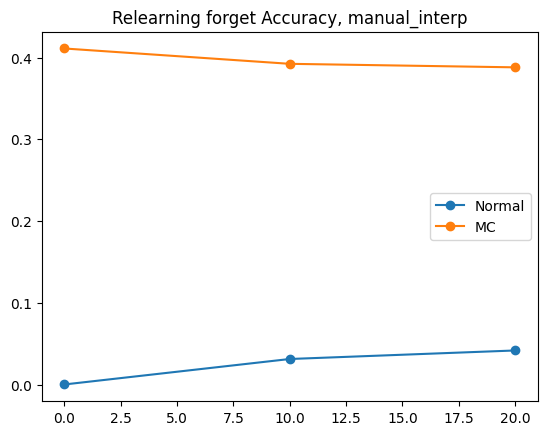

In [48]:
for task_name, task_split in [("Normal", "forget"), ("MC", "forget")]:
    x_vals = []
    y_vals = []
    for idx, point in enumerate(relearning_results["relearning_test_losses"]):
        if len(point) > 0:
            x_vals.append(idx)
            y_vals.append(point['adversarial'][task_name][task_split])
    plt.plot(x_vals, y_vals, label=task_name, marker="o")
plt.title(f"Relearning {task_split} Accuracy, {localization_type}")
plt.legend()
plt.show()

In [49]:
# softprompt results
with open(f"{model_parent_path}/results/softprompt_metrics.pkl", "rb") as f:
    softprompt_results = pickle.load(f)

print(softprompt_results)


[{'forget_acc': 0.38859230279922485, 'forget_acc_with_injected': 0.278786838054657, 'maintain_acc': 0.39850252866744995, 'loss_over_time': [{'toward': 11.00613784790039, 'total': 11.00613784790039}, {'toward': 8.600736618041992, 'total': 8.600736618041992}, {'toward': 6.6212944984436035, 'total': 6.6212944984436035}, {'toward': 4.661935329437256, 'total': 4.661935329437256}, {'toward': 2.9373624324798584, 'total': 2.9373624324798584}, {'toward': 4.065882205963135, 'total': 4.065882205963135}, {'toward': 4.641207695007324, 'total': 4.641207695007324}, {'toward': 3.564662456512451, 'total': 3.564662456512451}, {'toward': 2.1563069820404053, 'total': 2.1563069820404053}, {'toward': 1.7725260257720947, 'total': 1.7725260257720947}, {'toward': 1.353387475013733, 'total': 1.353387475013733}, {'toward': 1.1940399408340454, 'total': 1.1940399408340454}, {'toward': 1.1128119230270386, 'total': 1.1128119230270386}, {'toward': 0.6143884658813477, 'total': 0.6143884658813477}, {'toward': 0.4242081

In [50]:
print(sum(result["forget_acc"] for result in softprompt_results) / len(softprompt_results))
print(sum(result["maintain_acc"] for result in softprompt_results) / len(softprompt_results))

0.4136027619242668
0.545888215303421


# Multi Run Graphs

## Train/Test Statistics

In [2]:
localization_types = {"localized_ap": "Localized AP", "localized_ct": "Localized CT", "localized_ap_mlps": "Localized AP MLPs", "localized_ct_mlps": "Localized CT MLPs", "manual_interp": "Manual Interp", "random": "Random", "all_mlps": "All MLPs", "nonlocalized": "Non-Localized", "random_mlps": "Random MLPs"}
# model_names = {"llama3": "Llama 3 8b"} # "gemma": "Gemma 7b", "gemma2": "Gemma 2 9b", 
# forget_splits = {"16": "16 Random Athletes", "64": "64 Random Athletes"}
# inject_labels = {"random_without_golf": "Random (No Golf)"}

model_names = {"gemma": "Gemma 7b", "gemma2": "Gemma 2 9b", "llama3": "Llama 3 8b"}
forget_splits = {"16": "16 Facts"} #, "64": "64 Facts"
# inject_labels = {"random_without_golf": "Random (No Golf)"}
run_ids = ["1"]
final_epoch = 49

import itertools

# average over forget splits, inject labels, model names, and run_ids. For singular results, have only single elements
configs = list(itertools.product(model_names, forget_splits, run_ids))

test_losses_list = []
adversarial_evals_list = []
# side_effects_evals_list = []
mmlu_evals_list = []

do_probing_evals = False
probing_evals_list = []

do_relearning_evals = True
relearning_evals_list = []

do_softprompt_evals = True
softprompt_evals_list = []

for localization_type in localization_types:
    aggregated_results = []
    # Convert iterator to list and wrap with tqdm for proper progress tracking
    for model_name, forget_split, run_id in tqdm(configs, desc=f"Processing {localization_type}"):
        config_dir = {"localization_type": localization_types[localization_type], "model_name": model_name, "forget_split": forget_splits[forget_split], "run_id": run_id}

        save_dir = f"results_rebuttal_counterfact/{model_name}_forget_{forget_split}_inject/{localization_type}_run{run_id}"
        with open(f"{save_dir}/models/model_metrics.pkl", "rb") as f:
            model_metrics = pickle.load(f)

        for task, value in model_metrics["test_losses"].items():
            test_losses_list.append({
                **config_dir,
                "task_name": task,
                "test_loss": value[-1]
            })
        
        for eval_type, results in model_metrics["adversarial_evals"][final_epoch].items():
            adversarial_evals_list.append({
                **config_dir,
                "eval_type": eval_type,
                "forget": results["forget"],
                "maintain": results["maintain"]
            })
        
        with open(f"{save_dir}/full_capability_dict.pkl", "rb") as f:
            full_capability_dict = pickle.load(f)
        
        mmlu_evals_list.append({
            **config_dir,
            "mmlu": full_capability_dict["results"]["mmlu"]["acc,none"]
        })

        if do_probing_evals:
            with open(f"{save_dir}/results/probing_results.pkl", "rb") as f:
                probing_results = pickle.load(f)
            for layer in range(len(probing_results["forget_ground_truth_accs"])):
                probing_evals_list.append({
                    **config_dir,
                    "layer": layer,
                    "forget_ground_truth_acc": probing_results["forget_ground_truth_accs"][layer],
                    "forget_edit_acc": probing_results["forget_edit_accs"][layer],
                    "maintain_train_acc": probing_results["maintain_train_accs"][layer],
                    "maintain_test_acc": probing_results["maintain_test_accs"][layer]
                })


        if do_relearning_evals:
            with open(f"{save_dir}/results/relearning_results.pkl", "rb") as f:
                relearning_results = pickle.load(f)
            for step in range(len(relearning_results["relearning_test_losses"])):
                relearning_dict = relearning_results["relearning_test_losses"][step]
                if len(relearning_dict) > 0:
                    current_dict = {
                        **config_dir,
                        "step": step,
                        "mmlu": relearning_dict["MMLU"]["MMLU"]
                    }
                    for adversarial_eval_type in relearning_dict["adversarial"].keys():
                        for split in ["forget", "maintain"]:
                            current_dict[f"{adversarial_eval_type}_{split}"] = relearning_dict["adversarial"][adversarial_eval_type][split]
                    relearning_evals_list.append(current_dict)
        
        if do_softprompt_evals:
            with open(f"{save_dir}/results/softprompt_metrics.pkl", "rb") as f:
                softprompt_results = pickle.load(f)
            
            for softprompt_iter in range(len(softprompt_results)):
                softprompt_evals_list.append({
                    **config_dir,
                    "softprompt_iter": softprompt_iter,
                    "forget_acc": softprompt_results[softprompt_iter]["forget_acc"],
                    "forget_acc_with_injected": softprompt_results[softprompt_iter]["forget_acc_with_injected"],
                    "maintain_acc": softprompt_results[softprompt_iter]["maintain_acc"]
                })
            # for task_name, task_split in [("Normal", "forget"), ("MC", "forget")]:
            #     softprompt_evals_list.append({

SyntaxError: invalid syntax (3142548808.py, line 7)

In [3]:
# convert all to dataframes
test_losses_df = pd.DataFrame(test_losses_list)
adversarial_evals_df = pd.DataFrame(adversarial_evals_list)
mmlu_evals_df = pd.DataFrame(mmlu_evals_list)
if do_probing_evals:
    probing_evals_df = pd.DataFrame(probing_evals_list)
if do_relearning_evals:
    relearning_evals_df = pd.DataFrame(relearning_evals_list)
if do_softprompt_evals:
    softprompt_evals_df = pd.DataFrame(softprompt_evals_list)

In [4]:
# Define colors for each localization type
colors = {"Localized AP": "#e74c3c", "Localized CT": "#2ecc71", "Localized AP MLPs": "#3498db", "Localized CT MLPs": "#f1c40f", "Manual Interp": "#9b59b6", "Random": "#1abc9c", "All MLPs": "#e67e22", "Non-Localized": "#e74c3c", "Random MLPs": "#2ecc71"}

### Test Evals

In [3]:
test_losses_df

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3112407/2877479611.py", line 1, in <module>
    test_losses_df
NameError: name 'test_losses_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/ultratb.py", line 1457, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IP

In [6]:
test_losses_df[test_losses_df["task_name"].isin(["forget_fact_accuracy", "maintain_fact_accuracy"])].groupby(["localization_type", "task_name"]).mean(numeric_only=True)

test_loss
localization_type task_name                        
All MLPs          forget_fact_accuracy     0.000112
                  maintain_fact_accuracy   0.984487
Localized AP      forget_fact_accuracy     0.001628
                  maintain_fact_accuracy   0.977890
Localized AP MLPs forget_fact_accuracy     0.002729
                  maintain_fact_accuracy   0.976698
Localized CT      forget_fact_accuracy     0.001388
                  maintain_fact_accuracy   0.982306
Localized CT MLPs forget_fact_accuracy     0.000248
                  maintain_fact_accuracy   0.968365
Manual Interp     forget_fact_accuracy     0.000153
                  maintain_fact_accuracy   0.967622
Non-Localized     forget_fact_accuracy     0.000103
                  maintain_fact_accuracy   0.965728
Random            forget_fact_accuracy     0.000280
                  maintain_fact_accuracy   0.971016
Random MLPs       forget_fact_accuracy     0.000502
                  maintain_fact_accuracy   0.977319

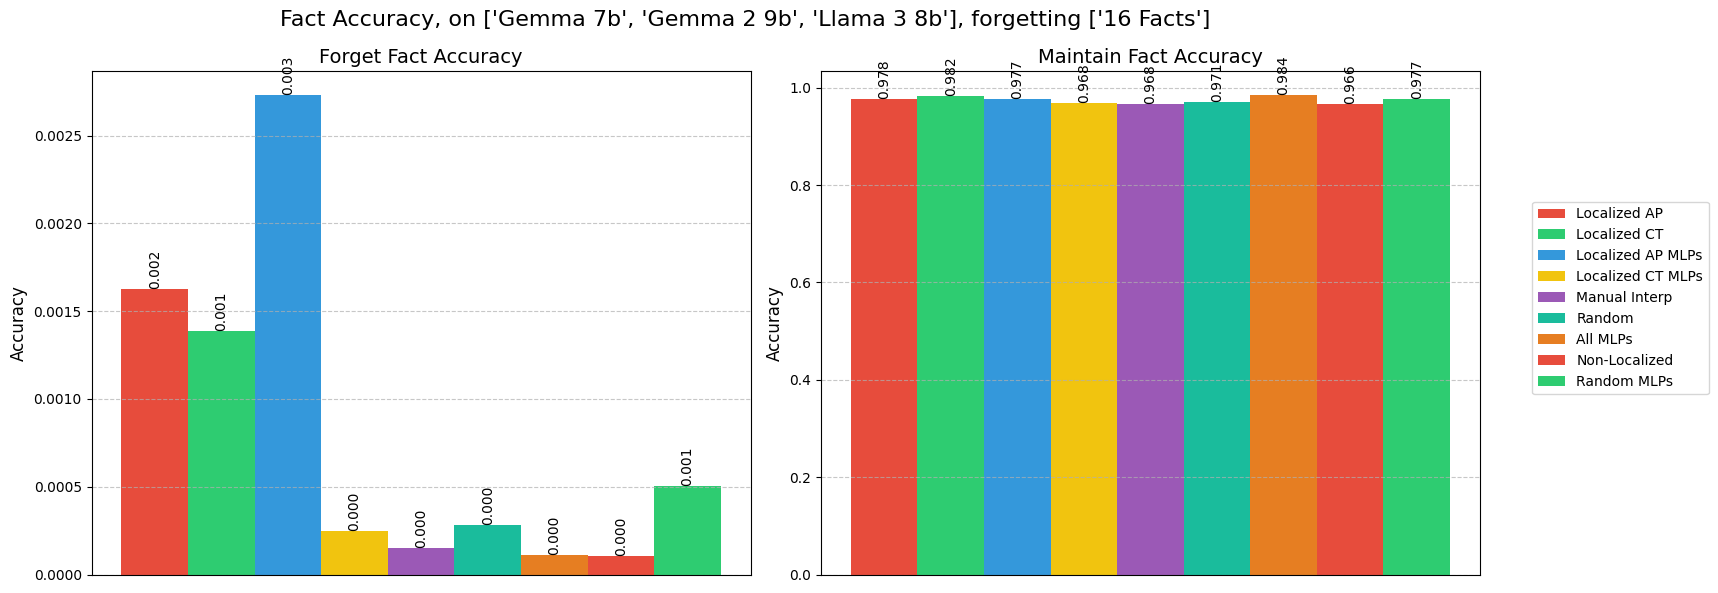

In [7]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = test_losses_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Only one bar position per subplot

# Plot Forget Sport Accuracy
for idx, loc_type in enumerate(loc_types):
    data = test_losses_df[test_losses_df['localization_type'] == loc_type]
    forget_acc = data[data['task_name'] == 'forget_fact_accuracy']['test_loss'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax1.bar(bar_position, forget_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax1.text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Maintain Sport Accuracy
for idx, loc_type in enumerate(loc_types):
    data = test_losses_df[test_losses_df['localization_type'] == loc_type]
    maintain_acc = data[data['task_name'] == 'maintain_fact_accuracy']['test_loss'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax2.bar(bar_position, maintain_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax2.text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Customize plots
ax1.set_ylabel('Accuracy', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Forget Fact Accuracy', fontsize=14)
ax2.set_title('Maintain Fact Accuracy', fontsize=14)
plt.suptitle(f"Fact Accuracy, on {list(model_names.values())}, forgetting {list(forget_splits.values())}", fontsize=16)

# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Adversarial Evals

In [8]:
adversarial_evals_df.groupby(["localization_type", "eval_type"]).mean(numeric_only=True)

forget  maintain
localization_type eval_type                                
All MLPs          MC                     0.645629  0.928902
                  MC_Injected            0.212906  0.021213
                  Neighborhood           0.652384  0.669426
                  Neighborhood_Injected  0.073321  0.012449
                  Normal                 0.000112  0.981736
...                                           ...       ...
Random MLPs       Neighborhood_Injected  0.050598  0.020979
                  Normal                 0.000502  0.970753
                  Normal_Injected        0.998837  0.003021
                  Paraphrase             0.170653  0.711776
                  Paraphrase_Injected    0.588823  0.002020

[72 rows x 2 columns]

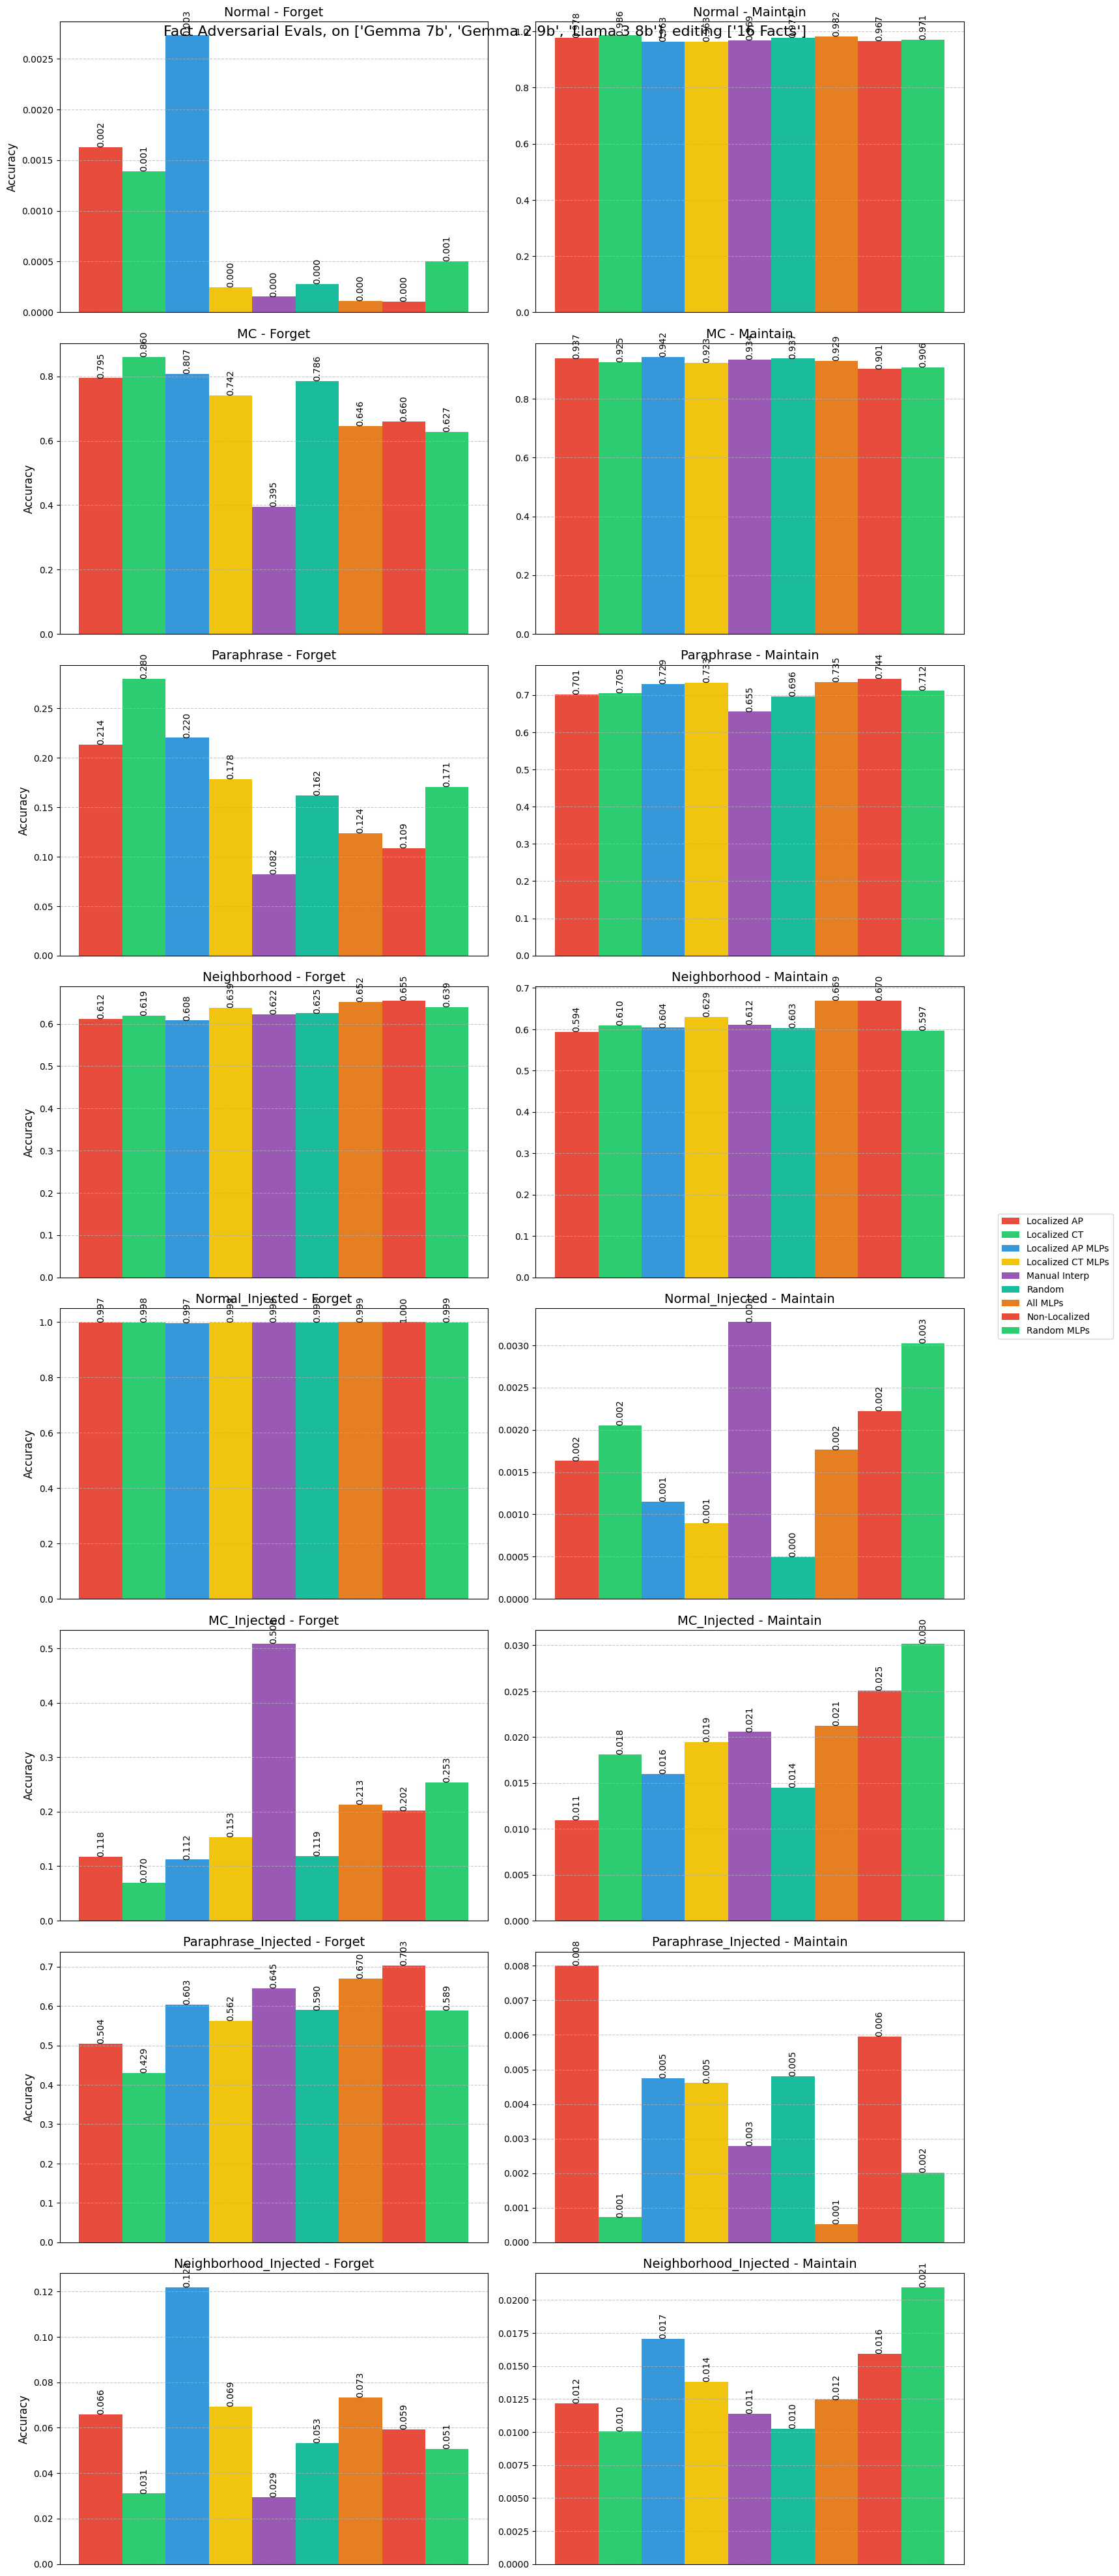

In [9]:
# Create figure and subplots - one row for each eval_type
eval_types = adversarial_evals_df['eval_type'].unique()
fig, axes = plt.subplots(len(eval_types), 2, figsize=(15, 5*len(eval_types)))

loc_types = adversarial_evals_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Single bar position per subplot

# Plot each eval_type in a row
for row_idx, eval_type in enumerate(eval_types):
    data = adversarial_evals_df[adversarial_evals_df['eval_type'] == eval_type]
    
    # Plot Forget Accuracy (left column)
    for idx, loc_type in enumerate(loc_types):
        loc_data = data[data['localization_type'] == loc_type]
        forget_acc = loc_data['forget'].mean()
        
        # Calculate bar position
        bar_position = x + idx*width - (len(loc_types)-1)*width/2
        
        # Create bar
        bar = axes[row_idx, 0].bar(bar_position, forget_acc, width, 
                                  label=loc_type, color=colors[loc_type])
        
        # Add value label
        axes[row_idx, 0].text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
                             ha='center', va='bottom', rotation=90)
    
    # Plot Maintain Accuracy (right column)
    for idx, loc_type in enumerate(loc_types):
        loc_data = data[data['localization_type'] == loc_type]
        maintain_acc = loc_data['maintain'].mean()
        
        # Calculate bar position
        bar_position = x + idx*width - (len(loc_types)-1)*width/2
        
        # Create bar
        bar = axes[row_idx, 1].bar(bar_position, maintain_acc, width, 
                                  label=loc_type, color=colors[loc_type])
        
        # Add value label
        axes[row_idx, 1].text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
                             ha='center', va='bottom', rotation=90)
    
    # Customize each subplot
    axes[row_idx, 0].set_ylabel('Accuracy', fontsize=12)
    axes[row_idx, 0].set_title(f'{eval_type} - Forget', fontsize=14)
    axes[row_idx, 1].set_title(f'{eval_type} - Maintain', fontsize=14)
    
    # Remove x ticks
    axes[row_idx, 0].set_xticks([])
    axes[row_idx, 1].set_xticks([])
    
    # Add grid
    axes[row_idx, 0].grid(True, linestyle='--', alpha=0.7)
    axes[row_idx, 1].grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
plt.suptitle(f"Fact Adversarial Evals, on {list(model_names.values())}, editing {list(forget_splits.values())}", fontsize=16)
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### MMLU Evals

In [10]:
mmlu_evals_df.groupby("localization_type").mean(numeric_only=True)

,mmlu
localization_type,
All MLPs,0.642406
Localized AP,0.642192
Localized AP MLPs,0.640009
Localized CT,0.644115
Localized CT MLPs,0.641908
Manual Interp,0.640578
Non-Localized,0.638988
Random,0.642098
Random MLPs,0.641338


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2936245/175551994.py", line 21, in <module>
    plt.title(f'MMLU Scores, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}', fontsize=12, pad=20)
                                                                                                                               ^^^^^^^^^^^^^
NameError: name 'inject_labels' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

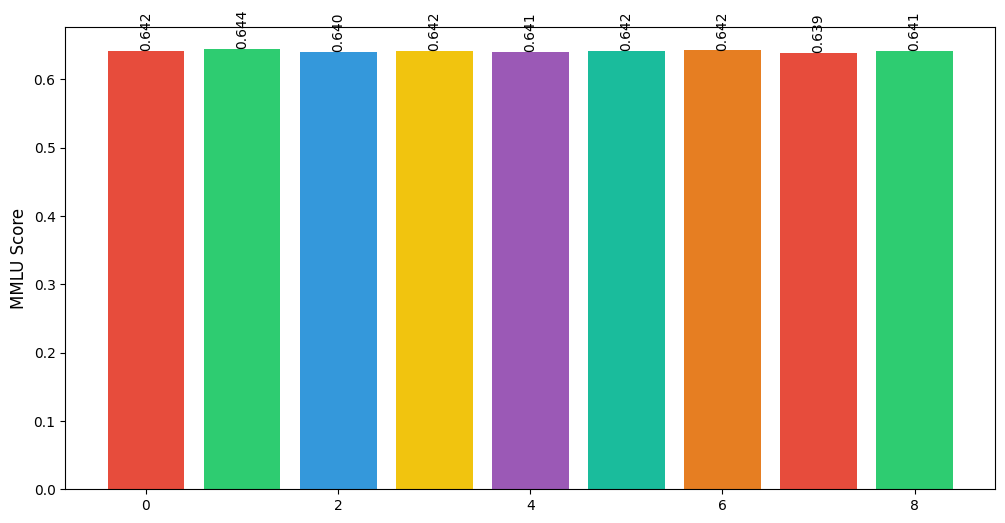

In [11]:
# Create figure
plt.figure(figsize=(12, 6))

# Get data
loc_types = mmlu_evals_df['localization_type'].unique()
mmlu_scores = [mmlu_evals_df[mmlu_evals_df['localization_type'] == loc_type]['mmlu'].mean() 
               for loc_type in loc_types]

# Create bars
bars = plt.bar(range(len(loc_types)), mmlu_scores, color=[colors[loc_type] for loc_type in loc_types])

# Add value labels above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom', rotation=90)

# Customize plot
plt.ylabel('MMLU Score', fontsize=12)
plt.title(f'MMLU Scores, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}', fontsize=12, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis labels
plt.xticks(range(len(loc_types)), loc_types, rotation=45, ha='right')

# Set y-axis limits
min_score = min(mmlu_scores) - 0.05
max_score = max(mmlu_scores) + 0.05
plt.ylim(min_score, max_score)

# Add legend
plt.legend(bars, loc_types, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

plt.show()

### Softprompt Evals

In [21]:
softprompt_evals_df.groupby(["localization_type"]).mean(numeric_only=True).drop("softprompt_iter", axis=1)

,forget_acc,forget_acc_with_injected,maintain_acc
localization_type,,,
All MLPs,0.316558,0.433324,0.724767
Localized AP,0.332639,0.379742,0.662699
Localized AP MLPs,0.352232,0.420622,0.671523
Localized CT,0.351343,0.458719,0.707035
Localized CT MLPs,0.326929,0.442703,0.704450
Manual Interp,0.308605,0.393943,0.617649
Non-Localized,0.327758,0.433313,0.718470
Random,0.364516,0.419055,0.724982
Random MLPs,0.348315,0.366625,0.672276


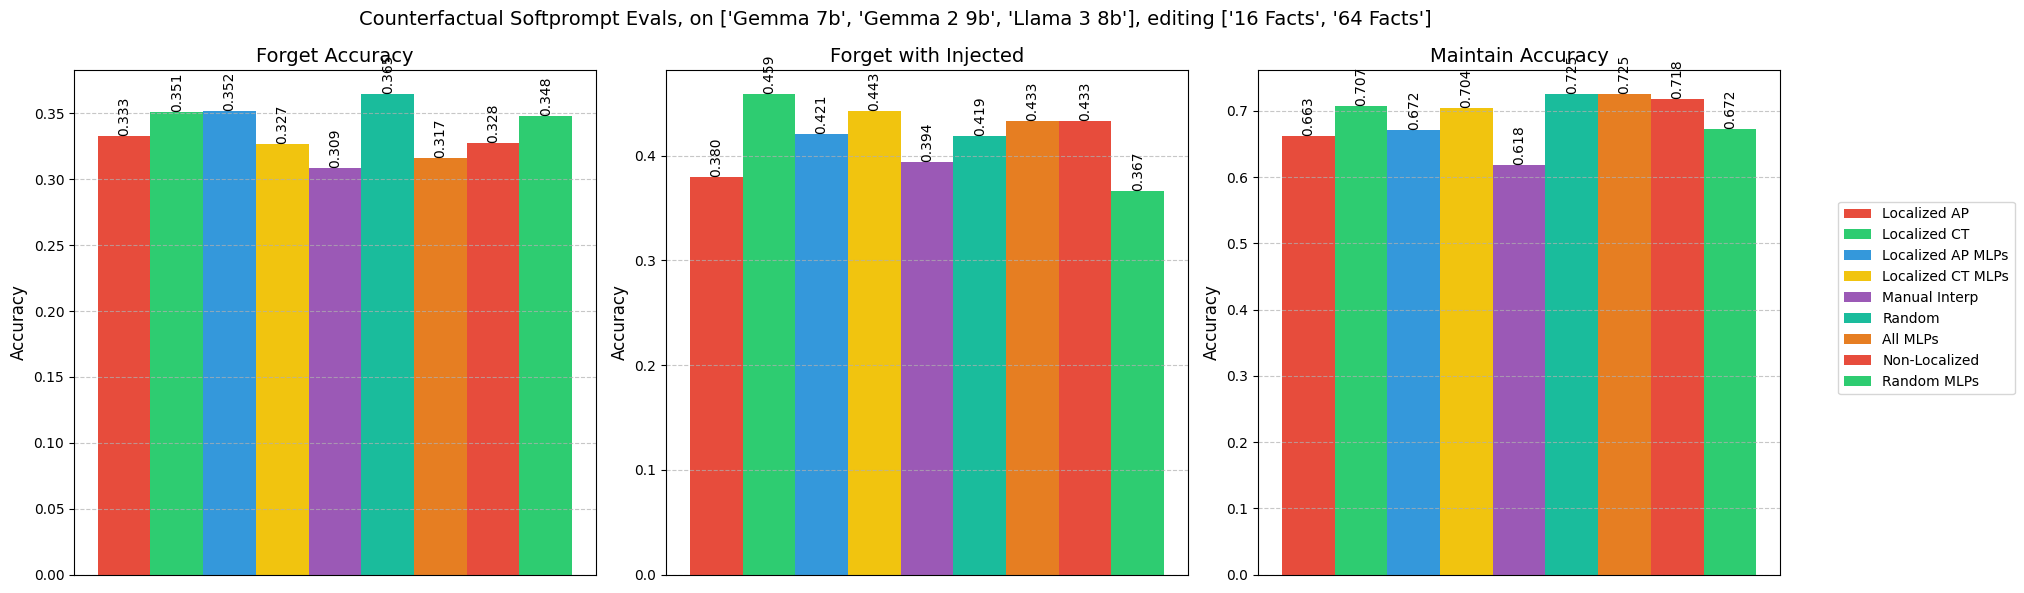

In [23]:
# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

loc_types = softprompt_evals_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Single bar position per subplot

# Plot Forget Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    forget_acc = data['forget_acc'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax1.bar(bar_position, forget_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax1.text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Forget with Injected Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    forget_injected_acc = data['forget_acc_with_injected'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax2.bar(bar_position, forget_injected_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax2.text(bar_position[0], forget_injected_acc, f'{forget_injected_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Maintain Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    maintain_acc = data['maintain_acc'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax3.bar(bar_position, maintain_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax3.text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Customize plots
for ax, title in zip([ax1, ax2, ax3], ['Forget Accuracy', 'Forget with Injected', 'Maintain Accuracy']):
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks([])
    ax.grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.suptitle(f"Counterfactual Softprompt Evals, on {list(model_names.values())}, editing {list(forget_splits.values())}", fontsize=14)
# Adjust layout
plt.tight_layout()

plt.show()

### Relearning Evals

In [4]:
relearning_evals_df.groupby(["localization_type", "step"]).mean(numeric_only=True)[["Normal_Injected_forget", "MC_Injected_forget"]]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3112407/829854490.py", line 1, in <module>
    relearning_evals_df.groupby(["localization_type", "step"]).mean(numeric_only=True)[["Normal_Injected_forget", "MC_Injected_forget"]]
    ^^^^^^^^^^^^^^^^^^^
NameError: name 'relearning_evals_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/data/phillip_guo/miniconda3/envs/cb/lib/python3.12/site-packages/IPython/core/ultratb.py", line 1457, in structured_traceback
    return Formatted

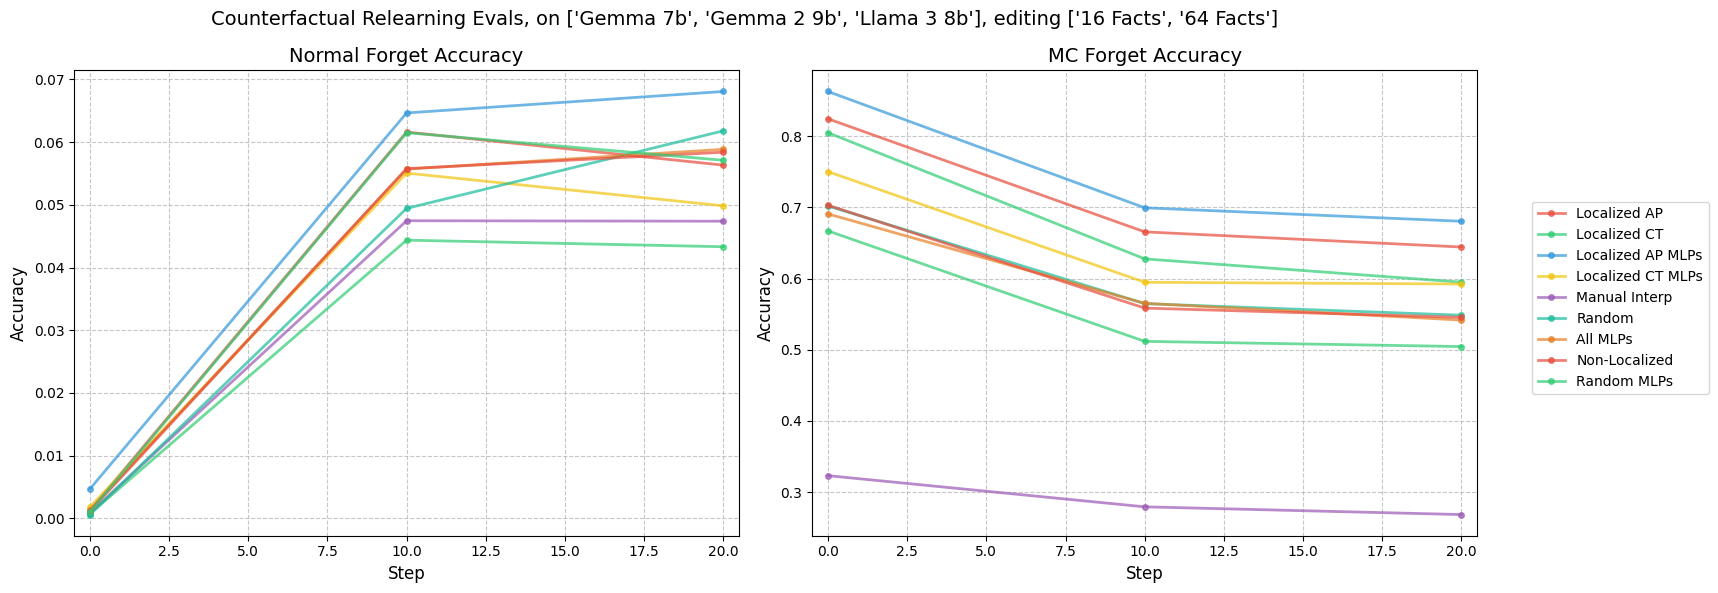

In [26]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = relearning_evals_df['localization_type'].unique()
steps = relearning_evals_df['step'].unique()

# Plot Normal Injected Forget
for loc_type in loc_types:
    data = relearning_evals_df[relearning_evals_df['localization_type'] == loc_type]
    normal_forget_vals = [data[data['step'] == step]['Normal_forget'].mean() 
                           for step in steps]
    
    ax1.plot(steps, normal_forget_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Plot MC Injected Forget
for loc_type in loc_types:
    data = relearning_evals_df[relearning_evals_df['localization_type'] == loc_type]
    mc_forget_vals = [data[data['step'] == step]['MC_forget'].mean() 
                        for step in steps]
    
    ax2.plot(steps, mc_forget_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Customize plots
for ax, title in zip([ax1, ax2], ['Normal Forget Accuracy', 'MC Forget Accuracy']):
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(-0.5, max(steps)+0.5)

# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.suptitle(f"Counterfact Relearning Evals, on {list(model_names.values())}, editing {list(forget_splits.values())}", fontsize=14)
# Adjust layout
plt.tight_layout()

plt.show()

## Paper Graphs